In [1]:
import pandas as pd
import numpy as np

trainingDf = pd.read_csv('train.csv')

In [2]:
trainingDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [3]:
trainingDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
trainingDf.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
print(trainingDf.columns[trainingDf.isna().any()].tolist())

['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [6]:
trainingDf.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
#Dropping loan_id
trainingDf = trainingDf.drop(columns=['Loan_ID'])

#Populating rows with null data with default values
trainingDf['Gender'] = trainingDf['Gender'].fillna('unknown')
trainingDf['Married'] = trainingDf['Married'].fillna('unknown')
trainingDf['Self_Employed'] = trainingDf['Self_Employed'].fillna('unknown')
trainingDf['Dependents'] = trainingDf['Dependents'].fillna(0)

#Dropping rows with empty values for following columns 'LoanAmount', 'Loan_Amount_Term', 'Credit_History'
trainingDf = trainingDf[trainingDf['LoanAmount'].notna()]
trainingDf = trainingDf[trainingDf['Loan_Amount_Term'].notna()]
trainingDf = trainingDf[trainingDf['Credit_History'].notna()]

trainingDf['Dependents'].replace(
    to_replace=['3+'],
    value='4',
    inplace=True
)

In [8]:
print("============COLUMNS WITH EMPTY VALUE=============")
print(trainingDf.columns[trainingDf.isna().any()].tolist())
print("Remaining rows after dropping data:", len(trainingDf.index))

============COLUMNS WITH EMPTY VALUE=============
[]
Remaining rows after dropping data: 529


In [9]:
print("============UNIQUE VALUE FOR CATEGORICAL DATA=============")
print("Gender: ", trainingDf['Gender'].unique())
print("Married: ", trainingDf['Married'].unique())
print("Education: ", trainingDf['Education'].unique())
print("Self_Employed: ", trainingDf['Self_Employed'].unique())
print("Property_Area: ", trainingDf['Property_Area'].unique())
print('\n')

============UNIQUE VALUE FOR CATEGORICAL DATA=============
Gender:  ['Male' 'Female' 'unknown']
Married:  ['Yes' 'No' 'unknown']
Education:  ['Graduate' 'Not Graduate']
Self_Employed:  ['No' 'Yes' 'unknown']
Property_Area:  ['Rural' 'Urban' 'Semiurban']




In [10]:
import seaborn as sb
import matplotlib.pyplot as plt

In [11]:
loan_status = trainingDf["Loan_Status"].copy()

In [12]:
training_categorical = trainingDf[["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]]
training_numerical = trainingDf[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History"]]

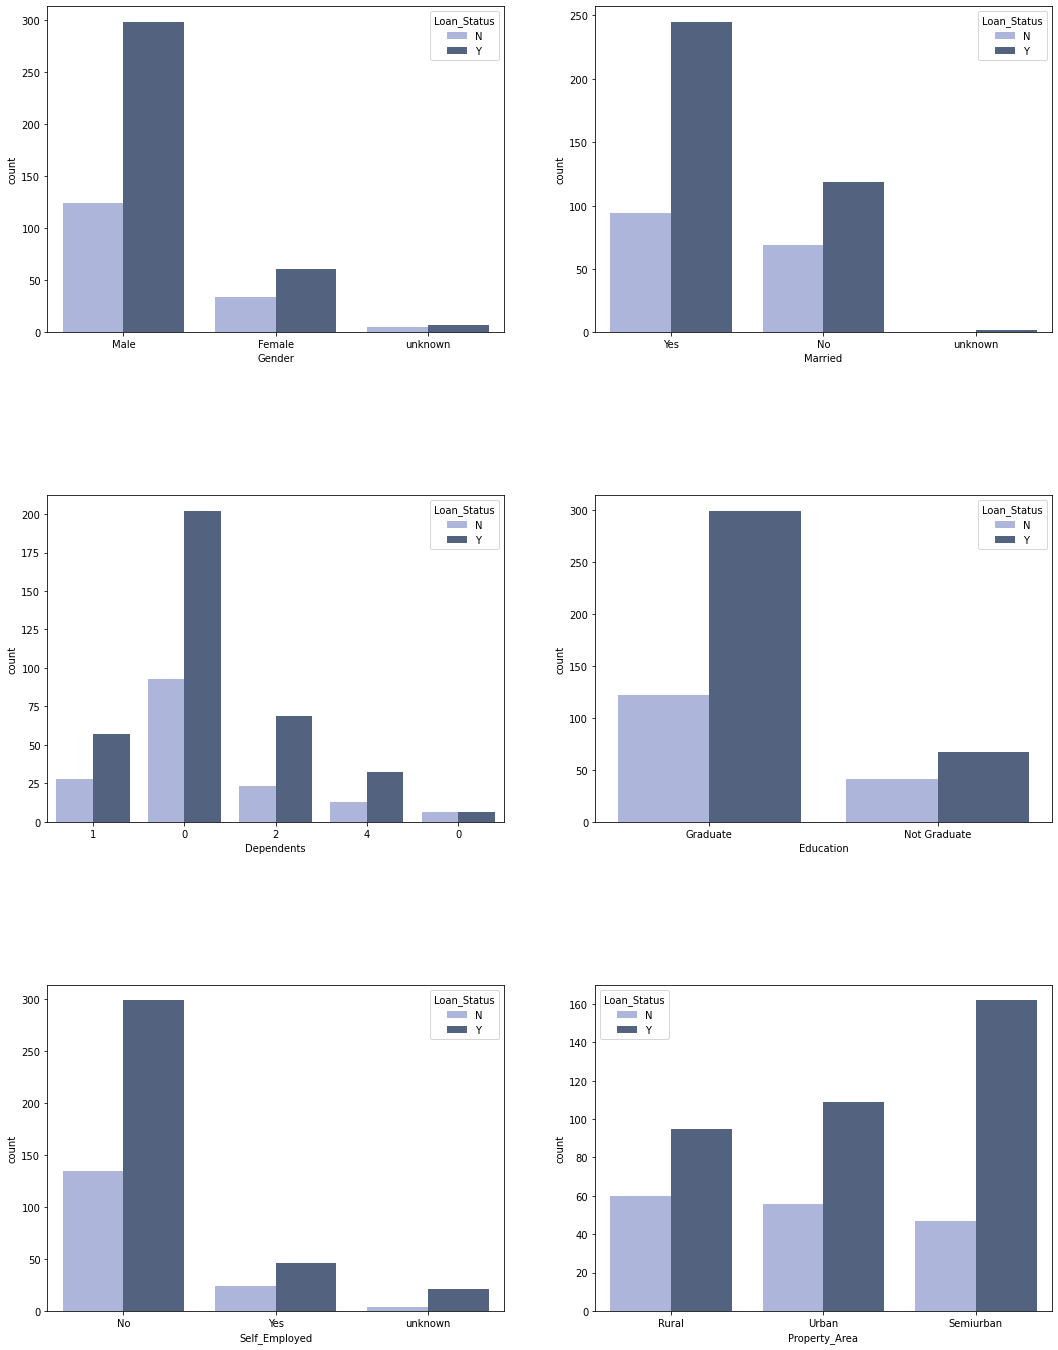

In [13]:
fig,axes = plt.subplots(3,2,figsize=(18,24))
index = 0
for category in (training_categorical):
    i, j = divmod(index, 2)
    sb.countplot(x=category,data=trainingDf,hue='Loan_Status',ax=axes[i,j], palette=['#A6B1E1',"#4C6085"])
    index += 1


plt.subplots_adjust(hspace=0.5)

In [ ]:
_ = training_numerical.hist(figsize=(16,16), grid=False)

In [ ]:
sb.pairplot(trainingDf, hue = "Loan_Status", height = 3 )
plt.show()

In [ ]:
training_numerical.describe()

In [ ]:
fig,axes = plt.subplots(2,3,figsize=(17,20))
index = 0
for numerical in (training_numerical):
    i, j = divmod(index, 3)
    sb.boxplot(y=numerical,data=trainingDf,x='Loan_Status',ax=axes[i,j],palette=['#A6B1E1',"#4C6085"] )
    index += 1

plt.subplots_adjust(hspace=0.5)